In [8]:
import requests
import json
import datetime as dt
import geopandas as gpd
import overpass
taskid = 6059
resp = requests.get(f'https://tasks.hotosm.org/api/v1/project/{taskid}?as_file')
filename = f'./task-{taskid}.geojson'
open(filename, 'wb').write(resp.content)
df = gpd.read_file(filename, layer=0)
df.geometry.bounds

,minx,miny,maxx,maxy
0,-75.691934,-5.246958,-75.660287,-5.216543


In [9]:
task = json.load(open(filename))

task.keys()
# taskjson['projectInfo']['name']
task['projectInfo']
print(task['created'])
print(task['lastUpdated'])


2019-05-27T11:04:44.327429
2019-05-28T17:00:29.485723


In [24]:
import overpass
import osm2geojson

created = dt.datetime.strptime(task['created'], '%Y-%m-%dT%H:%M:%S.%f')
for i in range(48):
  dtm = created + dt.timedelta(hours=i)
  dtm = dtm.strftime('%Y-%m-%dT%H:%M:%SZ')
  miny = float(df.geometry.bounds.miny)
  minx = float(df.geometry.bounds.minx)
  maxy = float(df.geometry.bounds.maxy)
  maxx = float(df.geometry.bounds.maxx)
  q = f"""
  [out:json][timeout:25][date:"{dtm}"];
  way[building]({miny},{minx},{maxy},{maxx});
  out ids tags;
  >;
  out;
  """
  resp = overpass.API().Get(q, build=False)
  json.dump(resp, open(f'./task-{taskid}-{dtm}.geojson', 'w'))

KeyError: 'created'

In [14]:
import glob

files = glob.glob(f'task-{taskid}-*Z.geojson')
lens = []
for file in files:
    task = json.load(open(file))
    lens.append(len(task['elements']))


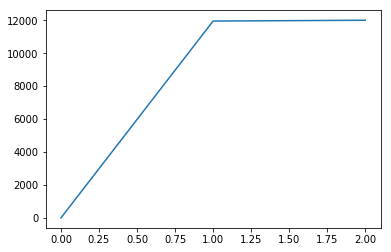

In [17]:
import matplotlib.pyplot as plt
plt.plot(lens)
plt.show()